# Trabajo integrador - Parte 2

# Aprendizaje Supervisado

**Nombre**:

## Problema de regresión

Para la creación de los datasets y la manipulación de los mismos vamos a trabajar directamente con dos módulos includios en la carpeta utils.

En esta podemos encontrar:
 - generate_data: Esta función wrappea el método de _make_regression_ de scikit learn para devolver un dataframe con un problema de regresión basado en sus parámetros.
 - generate_outliers: Esta función genera outliers livianos y pesados en función de los parámetros que le demos de entrada.

In [30]:
from utils.data_generation import generate_dataset
from utils.data_manipulation import generate_outliers

### Ejemplo de uso

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## Vamos a crear un dataset primero.

data = generate_dataset(
    n_samples=1000,
    n_features=5,
    n_informative=2,
    n_targets=1,
    noise=0,
    output='dataframe'
)

## esto nos genera un dataset que contiene 5 features, 2 de los cuales son informativos, y 1 target.

data.head()

x0        x1        x2        x3        x4      target
0 -1.621175 -0.188775  0.470473 -1.112691  0.602838 -129.100135
1 -0.638803  0.971519  1.313521 -0.589649  0.402736  -48.324926
2  1.747327  0.755363 -0.779078  0.588063  2.918199  140.489166
3 -1.691549 -0.491638  0.415749  0.208758 -0.576829 -135.421320
4 -2.102084  0.466265 -0.171075  1.096411 -1.819810 -165.666240

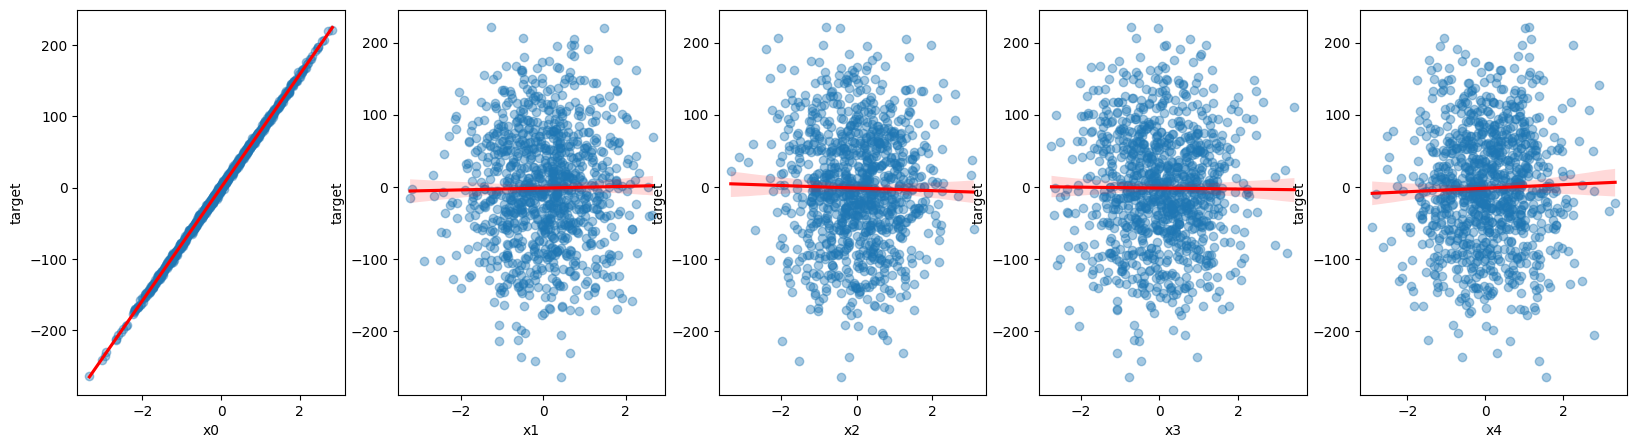

In [4]:
## vamos a visualizar estas variables
## creamos una figura de matplotlib que contenga 5 subplots, uno por cada feature:

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

## Creamos un loop para iterar sobre cada feature y graficar la regresión lineal entre cada feature y el target:

for i, feature in enumerate(data.columns[:-1]):
    sns.regplot(x=feature,
                y='target',
                data=data,
                ax=axes[i],
                scatter_kws={'alpha': 0.4},
                line_kws={'color': 'red'},
                ci=95)
    


Ahora agregamos _outliers_ a un nuevo dataset

In [5]:
data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=0,
    output='dataframe'
)


In [6]:
do1 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=False,
)
do2 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=True,
)
do3 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=False,
)

Text(0.5, 1.0, 'Outliers (one-tailed)')

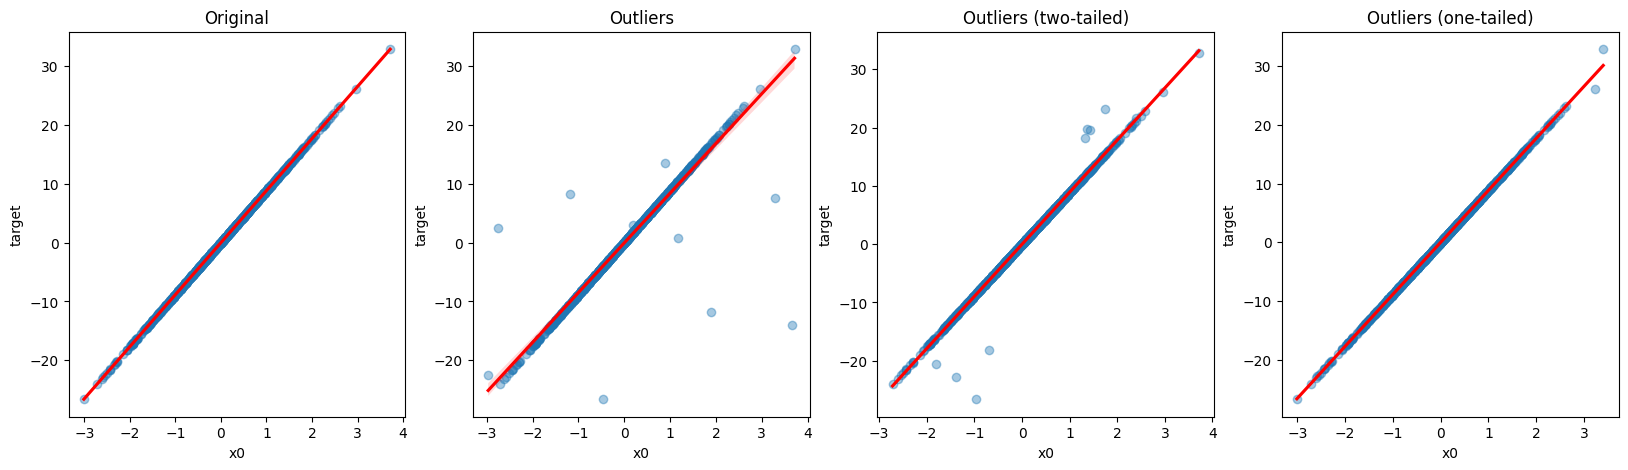

In [7]:
## vamos a visualizar estas los distintos datasets

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=do1,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')

sns.regplot(x='x0',
            y='target',
            data=do2,
            ax=axes[2],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[2].set_title('Outliers (two-tailed)')

sns.regplot(x='x0',
            y='target',
            data=do3,
            ax=axes[3],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[3].set_title('Outliers (one-tailed)')


Text(0.5, 1.0, 'Outliers')

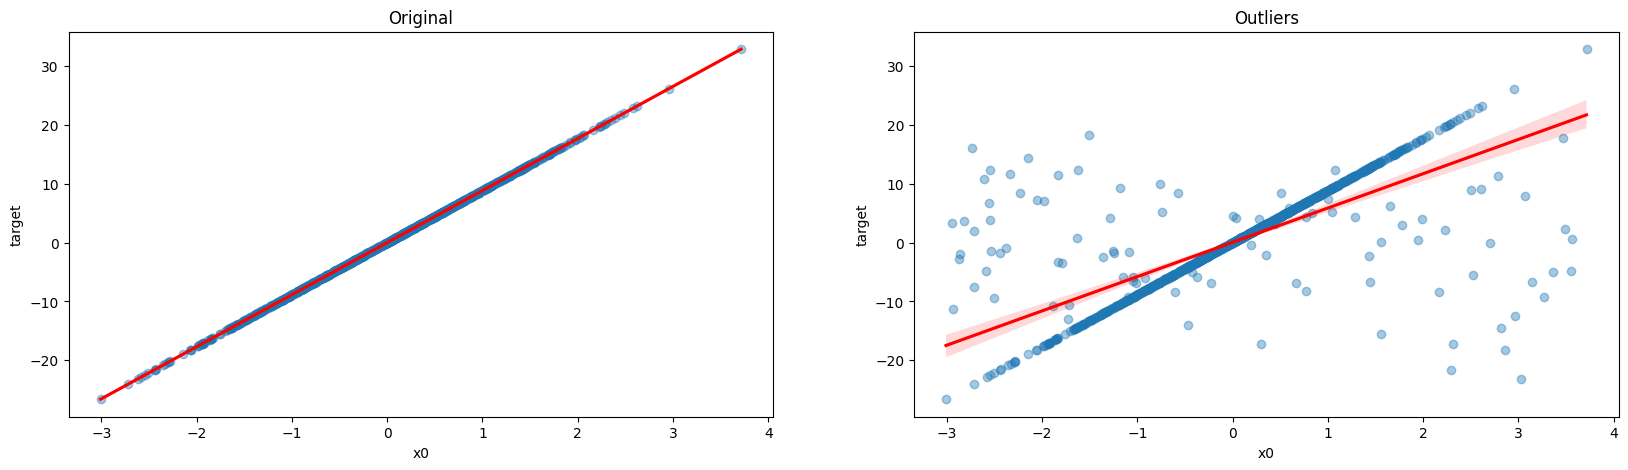

In [8]:
## y si lo queremos con mucho mas outliers?

doe = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.1,
    extreme_outliers=True)

## vamos a visualizar este caso

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=doe,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')


### Ejercicio 4

Utilizando la funcion `generate_data` generar un problema de regresión multivariada en el cual cuente con N variables informativas y M variables no informativas.

Ejemplo:
```python
data = generate_dataset(n_samples=1000,
                    n_features=10,
                    n_informative=5,
                    n_targets=1,
                    noise=20.0,
                    random_state=42,
                    output='dataframe')

```

Dado un valor de _noise_ fijo, sin fijar _random_state_ (para poder asegurarnos
que los datos que generamos son distintos) realizaremos 100 simulaciones de este dataset.

En la simulación deberemos generar el dataset, hacer una división de train-test, ajustar
un modelo de regresión lineal multivariada y validar el mismo.

En cada iteración de esta simulación debemos guardar:

- Los coeficientes de la regresión.
- El RMSE de train y test.
- El MAE de train y test. 


> Qué pasa con los coeficientes de las variables no informativas? La regresión se ve afectada por estas variables?
> ***HINT:*** Utilice las distribuciones de los coeficientes para analizar y test de hipótesis para sacar conclusiones.

In [9]:
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from utils.linear_regression import LinearRegression
from utils.linear_regression import MAE
from utils.linear_regression import MSE

In [10]:
## Parámetros de la simulación
n_exp = 100
n_samples = 1000
n_features = 10
n_informative = 2
n_targets = 1

noise = np.linspace(0, 100, 100)
bias = np.linspace(0, 100, 20)

In [11]:
## Inicializar listas para almacenar resultados
coefficients = []
train_rmse = []
test_rmse = []
train_mae = []
test_mae = []

In [12]:
## Esqueleto de la simulación
for _ in tqdm(range(n_exp)):
    for b in bias:
        for n in noise:
            data = generate_dataset(
                n_samples=n_samples,
                n_features=n_features,
                n_informative=n_informative,
                n_targets=n_targets,
                noise=n,
                bias=b,
                output='dataframe'
            )
            
    X = data.drop('target', axis=1)
    y = data['target']

    # División train-test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Entrenamiento del modelo
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Coeficientes del modelo
    coefficients.append(model.coefficients)  # Guardar coeficientes de variables no informativas

    # Predicciones
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse = MSE()
    mae = MAE()

    # Métricas de evaluación
    train_rmse.append(np.sqrt(mse(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mse(y_test, y_test_pred)))
    train_mae.append(mae(y_train, y_train_pred))
    test_mae.append(mae(y_test, y_test_pred))

  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\Windows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Windows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Windows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\Lo

In [13]:
print(coefficients)

[[89.40562809090844, 13.688463496113695, 4.234526643474477, 1.970916785085222, 0.4753479385129733, -3.547960262495071, -10.365080747271966, -4.257622239764681, 2.3152876930936, -4.905683478064324], [51.500300838254724, 18.33162585215124, -2.0560871202755338, -7.89024186126669, 1.9419602142419556, -2.7781754817878968, -10.6428949738333, -12.974865758916305, -8.879197219015417, -3.179159379826907], [0.20573959992640356, 17.121022604149623, -3.318266398722953, 7.212801243039449, -3.8753923945387125, 5.135638504948516, -6.0817650394212, 5.410303278315903, -2.5537462183868067, 2.9513407171764476], [15.830891525181556, -2.17758352805469, 0.1571898368375373, -1.9970237881716946, 14.451701693937167, 0.39182251895603715, 3.808825365518716, -3.316840538705215, 5.768436591715774, 5.2800693036747735], [62.895878015906106, 62.24402821401186, 7.666941901968523, 2.777408728862874, -4.133940155258533, 2.831890407717327, -2.6867069592444826, -8.352117027146045, -5.9267882278684745, -3.2638539261394115]

In [14]:
# Cargo librerías requeridas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Defino constantes
n_samples = 1000
n_features = 10
n_informative = 3
n_targets = 1

noise = np.linspace(0, 100, 100)
bias = np.linspace(0, 100, 20)

# Declaro listas para almacenar resultados
coeficients = []
train_rmse = []
test_rmse = []
train_mae = []
test_mae = []

## Esqueleto de la simulación
for _ in tqdm(range(n_exp)):
    for b in bias:
        for n in noise:
            data = generate_dataset(
                n_samples=n_samples,
                n_features=n_features,
                n_informative=n_informative,
                n_targets=n_targets,
                noise=n,
                bias=b,
                output='dataframe'
            )
    
    # Separo features (X) y variable objetivo (y)
    X = data.drop(columns='target')
    y = data['target']    
    
    # Divido dataset en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Ajusto modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Guardo coeficientes de la regresión
    coeficients.append(model.coef_)
    
    # Genero predicciones en conjunto de entrenamiento y prueba
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculo y guardo MSE y MAE en entrenamiento y prueba
    train_rmse.append(np.sqrt(mean_squared_error(y_train, train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, test_pred)))
    train_mae.append(mean_absolute_error(y_train, train_pred))
    test_mae.append(mean_absolute_error(y_test, test_pred))

100%|██████████| 100/100 [02:17<00:00,  1.38s/it]


In [15]:
# Convierto en arrays de numpy las listas
coeficients = np.array(coeficients)

# Calculo el valor medio de los coeficientes
mean_coef = np.mean(coeficients, axis=0)

# Y su desviación estándar
std_coef = np.std(coeficients, axis=0)
coef_df = pd.DataFrame({
    'Mean Coefficient': mean_coef,
    'Std Coefficient': std_coef
})

coef_df

Mean Coefficient  Std Coefficient
0         54.187300        29.041087
1         52.565362        31.004839
2         48.972875        29.803883
3          0.283777         3.745885
4          0.297944         3.283815
5         -0.041209         3.819798
6          0.152687         3.536845
7         -0.121433         3.416682
8          0.427683         3.497911
9          0.426777         3.469481

In [16]:
print("\nMean RMSE (Train):", np.mean(train_rmse))
print("Mean RMSE (Test):", np.mean(test_rmse))
print("Mean MAE (Train):", np.mean(train_mae))
print("Mean MAE (Test):", np.mean(test_mae))


Mean RMSE (Train): 99.34803659251723
Mean RMSE (Test): 100.38562461386363
Mean MAE (Train): 79.25862302741885
Mean MAE (Test): 80.45600695245835


In [17]:
from scipy import stats

# Realizo un test de hipótesis para cada coeficiente
p_values = []
for i in range(coeficients.shape[1]):
    coef_vals = coeficients[:, i]
    t_stat, p_val = stats.ttest_1samp(coef_vals, 0)
    p_values.append(p_val)

# Se considera un nivel de significancia (alfa)
alfa = 0.05
adjusted_p_values = alfa / len(p_values)
significant_variables = sum(1 for p in p_values if p < adjusted_p_values)
print(adjusted_p_values)

# Resultados
print("Número de variables no informativas significativas:", significant_variables)
print("P-values de los coeficientes de las variables no informativas:")
print(p_values)

0.005
Número de variables no informativas significativas: 3
P-values de los coeficientes de las variables no informativas:
[5.141127441298622e-34, 7.087660461264802e-31, 6.979400044056137e-30, 0.4527744564622105, 0.3688436854148316, 0.9147351447530292, 0.6684639723835784, 0.7243680263521652, 0.22666692635284874, 0.22388583635061096]


Las variables no informativas tienen coeficientes muy cercanos a cero. Esto indica que estas variables no están contribuyendo significativamente a la predicción del modelo.
Incluir variables no informativas puede hacer que el modelo sea más difícil de interpretar, ya que se introducen factores que no están relacionados con la variable dependiente.

#
#

### Ejercicio 5


Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generamos un dataset de regresion lineal simple (1 feature y 1 target value) con `noise` fijo en 0.5.
2. Generamos outliers fijando `extreme_outliers`.
3. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
4. Simular con multiples porcentajes de outliers (desde 1% hasta 10%). Qué pasa con los modelos?

Los modelos a utilizar en este problema son:

    - Regresion Lineal simple
    - Regresion de Huber
    - Regresión Ridge

In [18]:
### 1. Generamos un dataset de regresion lineal simple (1 feature y 1 target value) con `noise` fijo en 0.5.

# Cargo librerías requeridas
import numpy as np

# Defino constantes
n_exp = 100
n_samples = 1000
n_features = 1
n_informative = 1
n_targets = 1

noise = 0.5

## Esqueleto de la simulación
data = generate_dataset(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    n_targets=n_targets,
    noise=noise,
    output='dataframe'
)         


### 2. Generamos outliers fijando `extreme_outliers`.

# Generamos outliers con 1%    
do1 = generate_outliers(
df=data,
columns=['x0'],
percentage=0.01,
extreme_outliers=True,
only_tails=False,
)

# Generamos outliers con 5%
do2 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.05,
    extreme_outliers=True,
    only_tails=False,
)

# Generamos outliers con 10%
do3 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.1,
    extreme_outliers=True,
    only_tails=False,
)
        

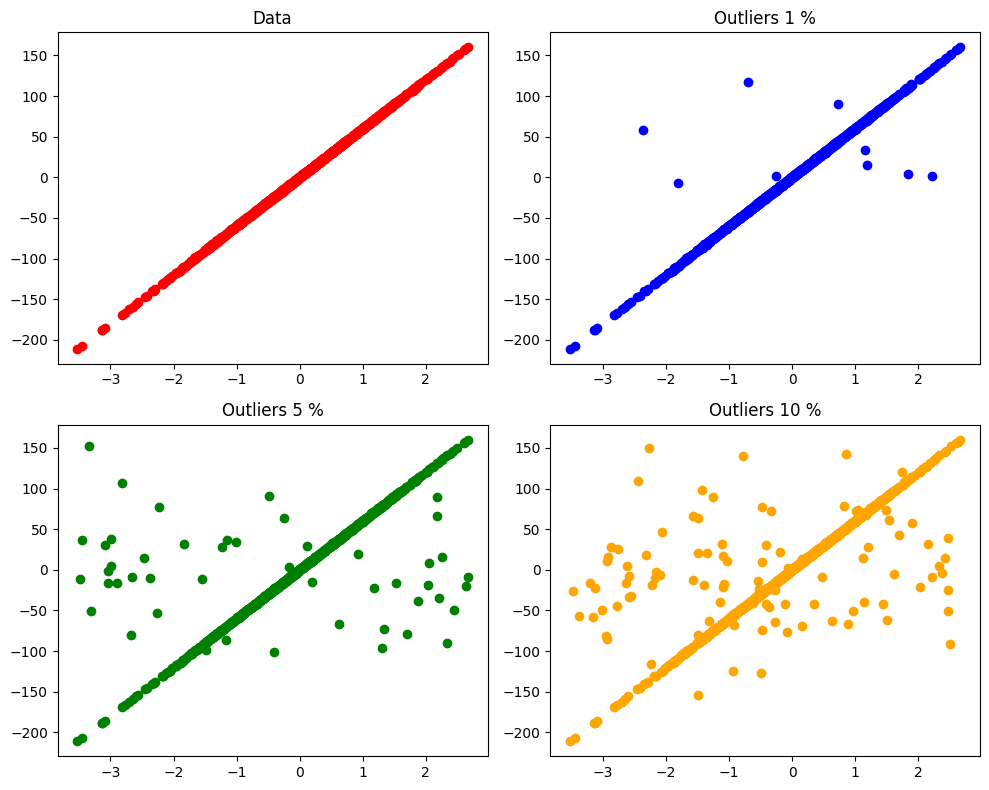

In [19]:
# Graficamos los datos generados

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].scatter(data['x0'], data['target'], color='red')
axs[0, 0].set_title('Data')

axs[0, 1].scatter(do1['x0'], do1['target'], color='blue')
axs[0, 1].set_title('Outliers 1 %')

axs[1, 0].scatter(do2['x0'], do2['target'], color='green')
axs[1, 0].set_title('Outliers 5 %')

axs[1, 1].scatter(do3['x0'], do3['target'], color='orange')
axs[1, 1].set_title('Outliers 10 %')

plt.tight_layout()

plt.show()

In [20]:
### 3. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
### 4. Simular con multiples porcentajes de outliers (desde 1% hasta 10%). ¿Qué pasa con los modelos?

# Creo una función que permite implementar los modelos y graficar los resultados.
def plot_with_regression(model, datasets):
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # 2 filas, 2 columnas para los subplots

    for i, data in enumerate(datasets):
        x = data[['x0']]
        y = data['target']

        # Entrenar el modelo de regresión lineal
        model.fit(x, y)

        # Predecir los valores y obtener la recta de regresión
        y_pred = model.predict(x)
        
        # Graficar puntos y la línea de regresión en cada subplot
        row = i // 2
        col = i % 2
        axs[row, col].scatter(x, y, color='blue', label='Data')
        axs[row, col].plot(x, y_pred, color='red', label='Regression')        
        axs[row, col].legend()

    # Ajustar el espaciado entre subplots
    plt.tight_layout()

    plt.show()  # Mostrar los subplots con la regresión lineal

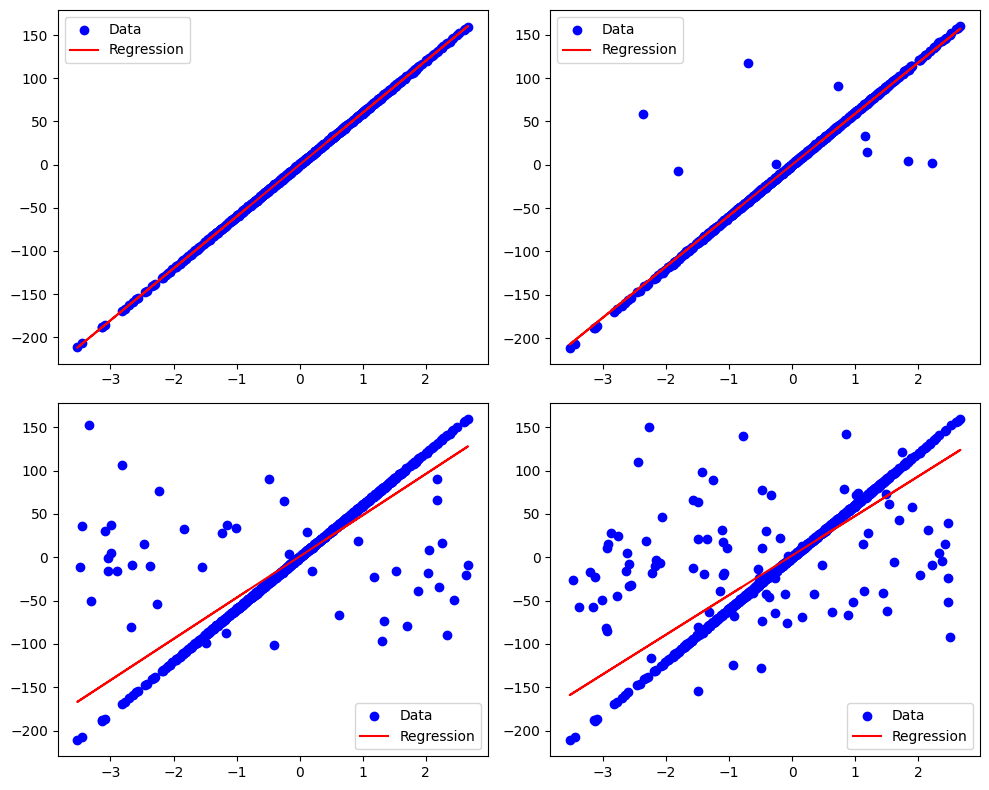

In [21]:
datasets = [data, do1, do2, do3]

from sklearn.linear_model import LinearRegression

plot_with_regression(LinearRegression(),datasets)

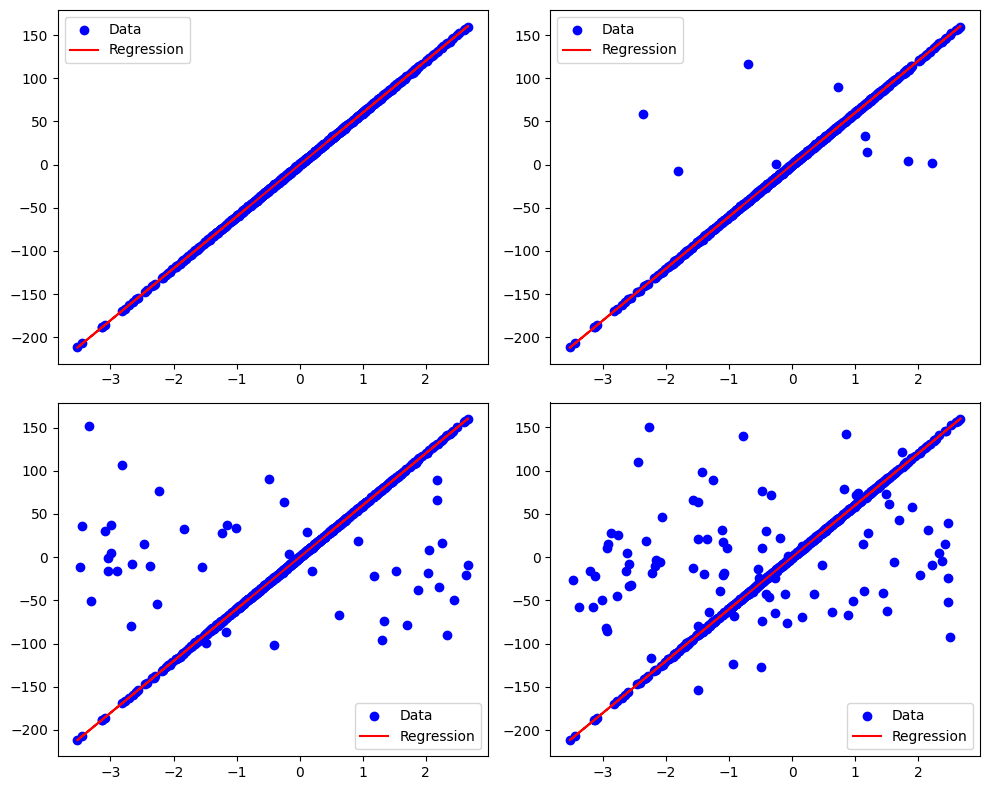

In [22]:
from sklearn.linear_model import HuberRegressor

plot_with_regression(HuberRegressor(),datasets)

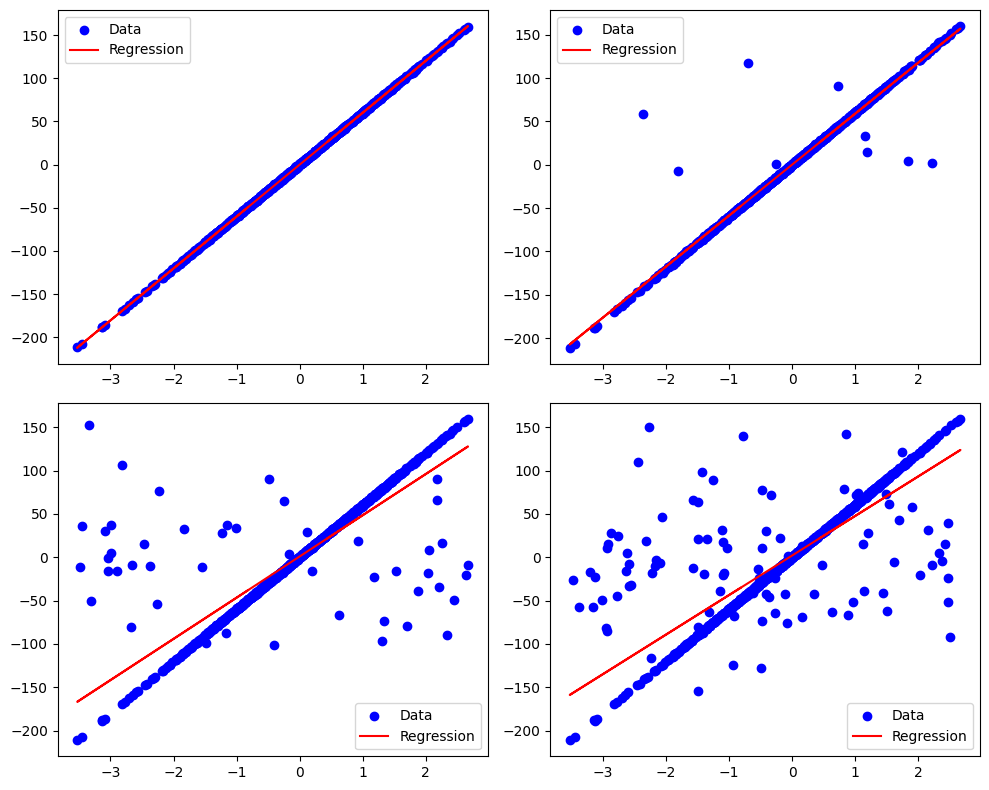

In [23]:
from sklearn.linear_model import RidgeCV

plot_with_regression(RidgeCV(),datasets)

El modelo RidgeCV arroja resultados similares a bLinearRegression, lo que implica que no logra evitar el ruido generado por los outliers. En cambio, el modelo HuberRegressor logra eliminar el aporte de los outliers logrando una buena pendiente.

#
#

## Problema de Clasificación

### Ejercicio 6

En este ejercicio vamos a jugar un poco con descenso de gradiente. Para esto consideremos lo visto en clase que es el problema de regresión.

Como paso inicial, vamos a sacarnos de encima la parte teórica. Recordemos que partimos del siguiente modelo

$$
y = \beta_0 + \beta_1 \cdot x
$$

En este caso nuestra función objetivo a optimizar será:

$$
MSE = ||y-\hat{y}||^2
$$


Para calcular el gradiente de la función de error cuadrático medio (MSE) con respecto a los parámetros $\beta_0$ y $\beta_1$, es útil primero expresar la función de coste de forma más explicita. Dado que $\hat{y} = \beta_0 + \beta_1 \cdot x$, podemos reescribir la función MSE como sigue:

$$
MSE(\beta_0, \beta_1) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)^2
$$

Aquí, $N$ es el número de observaciones en el conjunto de datos y $y_i$ y $x_i$ son el valor observado y el valor de la característica correspondiente para la i-ésima observación.

El gradiente de la función de coste está compuesto por las derivadas parciales de la función de coste con respecto a cada uno de los parámetros. Así, el gradiente es un vector de la forma:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{\partial MSE}{\partial \beta_0}, \frac{\partial MSE}{\partial \beta_1} \right]
$$

Las derivadas parciales se pueden calcular como sigue:

$$
\frac{\partial MSE}{\partial \beta_0} = \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

$$
\frac{\partial MSE}{\partial \beta_1} = \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

Así que finalmente tenemos:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i), \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i) \right]
$$

El cálculo del gradiente se usa en el descenso de gradiente para actualizar los parámetros $\beta_0$ y $\beta_1$ en cada iteración, en dirección opuesta al gradiente, para minimizar la función de coste.

Estos cálculos se pueden implementar en código Python de la siguiente manera:

```python
def gradient(X, y, beta0, beta1):
    N = len(y)
    y_hat = beta0 + beta1 * X

    d_beta0 = (-2/N) * np.sum(y - y_hat)
    d_beta1 = (-2/N) * np.sum(X * (y - y_hat))

    return d_beta0, d_beta1
```

Ahora, si quisieramos realizar esto de manera matricial, podemos hacer lo siguiente:

Primero, necesitamos cambiar la representación de nuestros datos. Podemos agregar un vector de unos a nuestra matriz de características para representar el término de intersección $\beta_0$. De esta manera, $X$ toma esta forma:

$$
X = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix}
$$

Y nuestro vector de parámetros $\theta$ se verá así:

$$
\theta = \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Entonces, nuestra predicción $\hat{y}$ se calcula como $X\theta$:

$$
\hat{y} = X\theta = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix} \cdot \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Nuestra función de coste MSE se ve de la siguiente manera en forma matricial:

$$
MSE(\theta) = \frac{1}{N} (y - X\theta)^T (y - X\theta)
$$

Las derivadas parciales de esta función de coste con respecto a los parámetros se pueden calcular de la siguiente manera:

$$
\frac{\partial MSE}{\partial \theta} = \frac{-2}{N} X^T (y - X\theta)
$$


Esto se puede implementar en Python de la siguiente manera:

In [57]:
def gradient(X: np.ndarray, y: np.ndarray, theta: np.ndarray) -> np.ndarray:
    """
    Esta función calcula el gradiente de la función de coste del error cuadrático medio (MSE)
    para una regresión lineal simple. La función toma como entrada la matriz de características X,
    el vector de observaciones y y el vector de parámetros theta, y devuelve el gradiente, que
    es un vector de las mismas dimensiones que theta.

    Params:
    X : numpy.ndarray
        La matriz de características extendida que incluye un vector de unos. De tamaño (N, d),
        donde N es el número de observaciones y d es el número de características (incluyendo el
        término de intersección).

    y : numpy.ndarray
        El vector de observaciones. De tamaño (N,), donde N es el número de observaciones.

    theta : numpy.ndarray
        El vector de parámetros. De tamaño (d,), donde d es el número de características
        (incluyendo el término de intersección).

    Returns:
    grad : numpy.ndarray
        El gradiente de la función de coste. Un vector de las mismas dimensiones que theta.

    Examples:
    >>> X = np.array([[1, 1], [1, 2], [1, 3]])
    >>> y = np.array([2, 3, 4])
    >>> theta = np.array([0, 0])
    >>> gradient(X, y, theta)
    array([-4., -8.])
    """

    N = len(y)
    y_hat = X.dot(theta)

    grad = (-2 / N) * X.T.dot(y - y_hat)

    return grad


Aquí, `X` es la matriz de características extendida que incluye un vector de unos, `y` es el vector de observaciones, y `theta` es el vector de parámetros. La función devuelve el gradiente, que es un vector de las mismas dimensiones que `theta`.

In [27]:
X = np.array([[1, 1], [1, 2], [1, 3]])
y = np.array([2, 3, 4])
theta = np.array([0, 0])
print(gradient(X, y, theta))

X
[[1 1]
 [1 2]
 [1 3]]
theta
[0 0]
[ -6.         -13.33333333]


#### Gradiente Descendente

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _GD_ que compute el gradiente descendente. Debe tener condición de frenado
por nr de épocas pero también por tolerancia.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

In [28]:
### 1. Crear una función _GD_ que compute el gradiente descendente. Debe tener condición de frenado por nr de épocas pero también por tolerancia.

import numpy as np

def GD(X, y, theta, learning_rate=0.01, max_iterations=10000, tol=1e-6):
    """
    Función que realiza el descenso de gradiente para encontrar los parámetros óptimos
    de un modelo de regresión lineal.

    Params:
    X : numpy.ndarray
        La matriz de características extendida que incluye un vector de unos. De tamaño (N, d),
        donde N es el número de observaciones y d es el número de características (incluyendo el
        término de intersección).

    y : numpy.ndarray
        El vector de observaciones. De tamaño (N,), donde N es el número de observaciones.

    theta : numpy.ndarray
        El vector de parámetros. De tamaño (d,), donde d es el número de características
        (incluyendo el término de intersección).

    learning_rate : float, opcional
        Tasa de aprendizaje para controlar el tamaño de los pasos en cada iteración.
        Por defecto es 0.01.

    max_iterations : int, opcional
        Número máximo de iteraciones permitidas. Por defecto es 1000.

    tol : float, opcional
        Tolerancia para la condición de parada basada en el cambio en los parámetros.
        Por defecto es 1e-6.

    Returns:
    theta_opt : numpy.ndarray
        Los parámetros óptimos encontrados por el descenso de gradiente.

    iterations : int
        El número de iteraciones realizadas.
    """

    iterations = 0
    
    while iterations < max_iterations:
        # Calculo el gradiente
        grad = gradient(X, y, theta)

        # Actualizo los parámetros
        new_theta = theta - learning_rate * grad

        # Defino la condición de parada
        if np.linalg.norm(new_theta - theta) < tol:
            break

        # Actualizo los parámetros para la siguiente iteración
        theta = new_theta
        iterations += 1

    return theta, iterations


In [54]:
### 2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)

# Defino constantes
n_samples = 10000
n_features = 1
n_informative = 1
n_targets = 1

bias = 5

## Esqueleto de la simulación
data = generate_dataset(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    n_targets=n_targets,
    bias=bias,
    output='dataframe'
)         

In [100]:
### 3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.

rand_theta = np.random.rand(2)

In [101]:
### 4. Tratamos de calcular los mejores parámetros con el algoritmo.

X = data.drop('target', axis=1)
y = data['target']

X['Ones'] = 1  # Agrego una columna llamada 'Ones' con valores de 1 en todas las filas

# Reordeno las columnas para tener 1 en la primer columna
X = X[['Ones'] + [col for col in X.columns if col != 'Ones']]

# Convierto en np.array
X = X.values

# Aplico el algoritmo de descenso de gradiente para encontrar los mejores parámetros
best_theta, iterations = GD(X, y, rand_theta)

print(best_theta)
print(iterations)

[ 5.22834516 74.68035803]
720


In [113]:
### 5. Guardamos la función de perdida en train y test en cada época.

# Defino una función que guarda la función de pérdida en cada época.

def GD_with_loss(X_train, y_train, theta,   X_test, y_test,    learning_rate=0.01, max_iterations=10000, tol=1e-6):
    """
    Función que realiza el descenso de gradiente para encontrar los parámetros óptimos
    de un modelo de regresión lineal. Guarda la función de pérdida en cada época para
    los conjuntos de entrenamiento y prueba.

    Params:
    X : numpy.ndarray
        La matriz de características extendida que incluye un vector de unos. De tamaño (N, d),
        donde N es el número de observaciones y d es el número de características (incluyendo el
        término de intersección).

    y : numpy.ndarray
        El vector de observaciones. De tamaño (N,), donde N es el número de observaciones.

    theta : numpy.ndarray
        El vector de parámetros. De tamaño (d,), donde d es el número de características
        (incluyendo el término de intersección).

    X_test : numpy.ndarray
        La matriz de características para el conjunto de prueba.

    y_test : numpy.ndarray
        El vector de observaciones para el conjunto de prueba.

    learning_rate : float, opcional
        Tasa de aprendizaje para controlar el tamaño de los pasos en cada iteración.
        Por defecto es 0.01.

    max_iterations : int, opcional
        Número máximo de iteraciones permitidas. Por defecto es 1000.

    tol : float, opcional
        Tolerancia para la condición de parada basada en el cambio en los parámetros.
        Por defecto es 1e-6.

    Returns:
    theta_opt : numpy.ndarray
        Los parámetros óptimos encontrados por el descenso de gradiente.

    loss_train : list
        Lista que almacena la función de pérdida en cada época para el conjunto de entrenamiento.

    loss_test : list
        Lista que almacena la función de pérdida en cada época para el conjunto de prueba.
    """

    iterations = 0
    loss_train = []
    loss_test = []

    while iterations < max_iterations:
        # Calculo el gradiente
        grad = gradient(X_train, y_train, theta)

        # Actualizo los parámetros
        new_theta = theta - learning_rate * grad



        # Calculo la función de pérdida en entrenamiento y prueba
        y_pred_train = X_train.dot(theta)
        y_pred_test = X_test.dot(theta)

        mse_train = np.mean((y_train - y_pred_train) ** 2)
        mse_test = np.mean((y_test - y_pred_test) ** 2)

        loss_train.append(mse_train)
        loss_test.append(mse_test)




        # Defino la condición de parada
        if np.linalg.norm(new_theta - theta) < tol:
            break

        # Actualizo los parámetros para la siguiente iteración
        theta = new_theta
        iterations += 1

    return theta, iterations, loss_train, loss_test


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
best_theta, iterations, loss_train, loss_test=  GD_with_loss(X_train, y_train, theta,   X_test, y_test  )


print(best_theta)
print(iterations)
print(loss_train)
print(loss_test)



[ 5.1626383  50.57096448]
674
[2734.177664485975, 2627.713591053197, 2525.550236009558, 2427.5138455297, 2333.437686512507, 2243.1617628660547, 2156.532543259157, 2073.4026998760232, 1993.6308577292725, 1917.0813541045375, 1843.6240077271405, 1773.13389725787, 1705.4911487407876, 1640.5807316412222, 1578.292263126752, 1518.5198202579884, 1461.1617597694656, 1406.1205451338542, 1353.302580615112, 1302.6180520280977, 1253.9807739335795, 1207.3080430085413, 1162.520497342187, 1119.541981418146, 1078.2994165530606, 1038.722676571017, 1000.7444685022135, 964.300218102794, 929.3279600009972, 895.7682322826421, 863.5639753365275, 832.6604347875798, 803.0050683525383, 774.5474564596448, 747.2392164802197, 721.033920426145, 695.8870159731792, 671.7557506756981, 648.5990992438717, 626.3776937595227, 605.053756711889, 584.5910367393419, 564.9547469676867, 546.1115058401218, 528.0292803381528, 510.67733149683636, 494.02616212163724, 478.0474666179203, 462.7140828477035, 447.9999459317456, 433.8800

#### Gradiente Descendente Estocástico

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _SGD_ que compute el gradiente descendente estocástico.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

In [75]:
### 1. Crear una función _SGD_ que compute el gradiente descendente estocástico.

import numpy as np

def SGD(X, y, theta, learning_rate=0.01, max_iterations=10000, tol=1e-6):
    """
    Función que realiza el descenso de gradiente para encontrar los parámetros óptimos
    de un modelo de regresión lineal.

    Params:
    X : numpy.ndarray
        La matriz de características extendida que incluye un vector de unos. De tamaño (N, d),
        donde N es el número de observaciones y d es el número de características (incluyendo el
        término de intersección).

    y : numpy.ndarray
        El vector de observaciones. De tamaño (N,), donde N es el número de observaciones.

    theta : numpy.ndarray
        El vector de parámetros. De tamaño (d,), donde d es el número de características
        (incluyendo el término de intersección).

    learning_rate : float, opcional
        Tasa de aprendizaje para controlar el tamaño de los pasos en cada iteración.
        Por defecto es 0.01.

    max_iterations : int, opcional
        Número máximo de iteraciones permitidas. Por defecto es 1000.

    tol : float, opcional
        Tolerancia para la condición de parada basada en el cambio en los parámetros.
        Por defecto es 1e-6.

    Returns:
    theta_opt : numpy.ndarray
        Los parámetros óptimos encontrados por el descenso de gradiente.

    iterations : int
        El número de iteraciones realizadas.
    """

    iterations = 0
    N = len(y)
    
    while iterations < max_iterations:
        # Selecciono un ejemplo aleatorio
        random_index = np.random.randint(N)
        X_i = X[random_index:random_index+1]
        y_i = y[random_index:random_index+1]

        # Calculo el gradiente
        grad = gradient(X_i, y_i, theta)

        # Actualizo los parámetros
        new_theta = theta - learning_rate * grad

        # Defino la condición de parada
        if np.linalg.norm(new_theta - theta) < tol:
            break

        # Actualizo los parámetros para la siguiente iteración
        theta = new_theta
        iterations += 1

    return theta, iterations

In [31]:
### 2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)

# Defino constantes
n_samples = 10000
n_features = 1
n_informative = 1
n_targets = 1

bias = 5

## Esqueleto de la simulación
data = generate_dataset(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    n_targets=n_targets,
    bias=bias,
    output='dataframe'
)        

In [32]:
### 3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.

rand_theta = np.random.rand(2)

In [33]:
### 4. Tratamos de calcular los mejores parámetros con el algoritmo.

X = data.drop('target', axis=1)
y = data['target']

X['Ones'] = 1  # Agrego una columna llamada 'Ones' con valores de 1 en todas las filas

# Reordeno las columnas para tener 1 en la primer columna
X = X[['Ones'] + [col for col in X.columns if col != 'Ones']]

# Convierto en np.array
X = X.values

# Aplico el algoritmo de descenso de gradiente estocástico para encontrar los mejores parámetros
best_theta, iterations = SGD(X, y, rand_theta)

print(best_theta)
print(iterations)

X
[[1.         1.96282263]]
theta
[0.96459161 0.83602292]
X
[[ 1.         -0.62897973]]
theta
[1.36450362 1.62097925]
X
[[ 1.         -1.30145694]]
theta
[1.43154294 1.57881288]
X
[[1.         1.42098535]]
theta
[1.04881781 2.07691316]
X
[[ 1.         -2.05887068]]
theta
[1.39141202 2.56373453]
X
[[1.         1.23854995]]
theta
[1.12054074 3.12142346]
X
[[1.        1.1772366]]
theta
[1.56584087 3.67294992]
X
[[1.         0.25719485]]
theta
[1.93550772 4.10813527]
X
[[1.         0.04370267]]
theta
[1.58427323 4.01779956]
X
[[ 1.         -1.31406731]]
theta
[1.59647303 4.01833273]
X
[[ 1.         -0.92187097]]
theta
[1.85062952 3.684354  ]
X
[[1.         0.06929406]]
theta
[1.51129058 3.99718072]
X
[[1.         0.07811511]]
theta
[1.27368334 3.98071594]
X
[[1.         0.29020912]]
theta
[1.78242637 4.02045646]
X
[[1.         0.42944825]]
theta
[1.95897178 4.07169155]
X
[[1.         0.14205009]]
theta
[1.60732881 3.92067909]
X
[[ 1.         -0.50738368]]
theta
[1.58347866 3.91729118]
X
[[

In [34]:
### 5. Guardamos la función de perdida en train y test en cada época.

# Defino una función que guarda la función de pérdida en cada época.

def SGD_with_loss(X, y, theta, X_test, y_test, learning_rate=0.01, max_iterations=10000, tol=1e-6):
    """
    Función que realiza el gradiente descendiente estocástico (SGD) para encontrar los parámetros óptimos
    de un modelo de regresión lineal. Guarda la función de pérdida en cada época para
    los conjuntos de entrenamiento y prueba.

    Params:
    X : numpy.ndarray
        La matriz de características extendida que incluye un vector de unos. De tamaño (N, d),
        donde N es el número de observaciones y d es el número de características (incluyendo el
        término de intersección).

    y : numpy.ndarray
        El vector de observaciones. De tamaño (N,), donde N es el número de observaciones.

    theta : numpy.ndarray
        El vector de parámetros. De tamaño (d,), donde d es el número de características
        (incluyendo el término de intersección).

    X_test : numpy.ndarray
        La matriz de características para el conjunto de prueba.

    y_test : numpy.ndarray
        El vector de observaciones para el conjunto de prueba.

    learning_rate : float, opcional
        Tasa de aprendizaje para controlar el tamaño de los pasos en cada iteración.
        Por defecto es 0.01.

    max_iterations : int, opcional
        Número máximo de iteraciones permitidas. Por defecto es 1000.

    tol : float, opcional
        Tolerancia para la condición de parada basada en el cambio en los parámetros.
        Por defecto es 1e-6.

    Returns:
    theta_opt : numpy.ndarray
        Los parámetros óptimos encontrados por el gradiente descendiente estocástico.

    loss_train : list
        Lista que almacena la función de pérdida en cada época para el conjunto de entrenamiento.

    loss_test : list
        Lista que almacena la función de pérdida en cada época para el conjunto de prueba.
    """

    iterations = 0
    N = len(y)
    loss_train = []
    loss_test = []

    while iterations < max_iterations:
        # Selecciono un ejemplo aleatorio
        random_index = np.random.randint(N)
        X_i = X[random_index:random_index+1]
        y_i = y[random_index:random_index+1]

        # Calculo el gradiente para un ejemplo
        grad = gradient(X_i, y_i, theta)

        # Actualizo los parámetros
        new_theta = theta - learning_rate * grad

        # Calculo la función de pérdida en entrenamiento y prueba
        y_pred_train = X.dot(theta)
        y_pred_test = X_test.dot(theta)

        mse_train = np.mean((y - y_pred_train) ** 2)
        mse_test = np.mean((y_test - y_pred_test) ** 2)

        loss_train.append(mse_train)
        loss_test.append(mse_test)

        # Condición de parada
        if np.linalg.norm(new_theta - theta) < tol:
            break

        # Actualizo los parámetros para la siguiente iteración
        theta = new_theta
        iterations += 1

    return theta, iterations, loss_train, loss_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
best_theta, iterations, loss_train, loss_test=  SGD_with_loss(X_train, y_train, theta,   X_test, y_test,    )


print(best_theta)
print(iterations)
print(loss_train)
print(loss_test)


X
[[ 1.         -1.49553626]]
theta
[0 0]
X
[[1.         0.84083876]]
theta
[-0.48318082  0.72261443]
X
[[ 1.         -1.11016686]]
theta
[-0.40506763  0.78829503]
X
[[ 1.         -0.44318663]]
theta
[-0.50500067  0.89923738]
X
[[1.         1.13963781]]
theta
[-0.42765613  0.86495931]
X
[[1.         0.90981022]]
theta
[-0.19190805  1.13362674]
X
[[ 1.         -0.93800742]]
theta
[0.2811502  1.56401997]
X
[[ 1.         -1.16578493]]
theta
[0.20906857 1.63163307]
X
[[1.         0.62404526]]
theta
[-0.07093541  1.95805749]
X
[[ 1.         -0.76494524]]
theta
[0.17654134 2.11249419]
X
[[ 1.         -0.22324835]]
theta
[-9.72317535e-04  2.24828242e+00]
X
[[ 1.        -0.9420659]]
theta
[0.31296683 2.17819602]
X
[[ 1.         -0.89414144]]
theta
[0.58457325 1.92232488]
X
[[1.         0.56936592]]
theta
[0.23703235 2.23307559]
X
[[ 1.         -1.90820258]]
theta
[0.79066582 2.54829562]
X
[[1.         0.02018776]]
theta
[0.73064585 2.66282589]
X
[[1.         1.33811522]]
theta
[1.04774117 2.66

Analice:

1. Cómo se comportan estos algoritmos? se puede ver la diferencia entre SGD y GD?.

Luego de varias ejecucione de GD y SGD se pudo apreciar cómo SGD llega a los resultados en un número de iteraciones aleatorio, pudiendo lograr mejor o peor performance que GD, que manitene un número de iteraciones más estable para un mismo conjunto de datos. También se aprecia la diferencia en tiempos de ejecución.

2. Cómo afecto el _learning rate_ a estos algoritmos? Realice una simulación del mismo cambiando el `lr`.
3. Compare en una curva de Perdida vs Epoch los dos algoritmos. Nota algo interesante?

In [124]:
### 2. Cómo afecto el _learning rate_ a estos algoritmos? Realice una simulación del mismo cambiando el `lr`.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
best_theta, iterations, loss_train, loss_test=  GD_with_loss(X_train, y_train, theta,   X_test, y_test,   learning_rate=0.001)
stochastic_best_theta, stochastic_iterations, stochastic_loss_train, stochastic_loss_test=  SGD_with_loss(X_train, y_train, theta,   X_test, y_test,    learning_rate=0.001)

print(best_theta)
print(iterations)
print(loss_train)
print(loss_test)

print(stochastic_best_theta)
print(stochastic_iterations)
print(stochastic_loss_train)
print(stochastic_loss_test)


[ 5.11496062 50.50349398]
5660
[2729.8431169859878, 2719.1180918032405, 2708.436812190447, 2697.799099698227, 2687.204776605211, 2676.6536659150765, 2666.145591353588, 2655.680377365647, 2645.2578491123622, 2634.8778324681275, 2624.540154017707, 2614.244641053344, 2603.991121571867, 2593.779424271819, 2583.6093785505955, 2573.480814501588, 2563.393562911352, 2553.347455256771, 2543.342323702244, 2533.378001096882, 2523.4543209717094, 2513.571117536886, 2503.728225678935, 2493.9254809579816, 2484.162719605008, 2474.4397785191127, 2464.7564952647867, 2455.1127080691986, 2445.5082558194913, 2435.942978060086, 2426.416714990005, 2416.9293074601983, 2407.480596970884, 2398.0704256689, 2388.698636345064, 2379.3650724315494, 2370.0695779992648, 2360.81199775525, 2351.5921770400805, 2342.409961825283, 2333.2651987107593, 2324.157734922223, 2315.0874183086494, 2306.054097339728, 2297.057621103332, 2288.097839302998, 2279.1746022554107, 2270.287760887902, 2261.4371667359624, 2252.6226719407564, 

Se puede apreciar que se modifica el número de iteraciones requeridas para obtener los theta, y también se modifica la presición de los resultados.

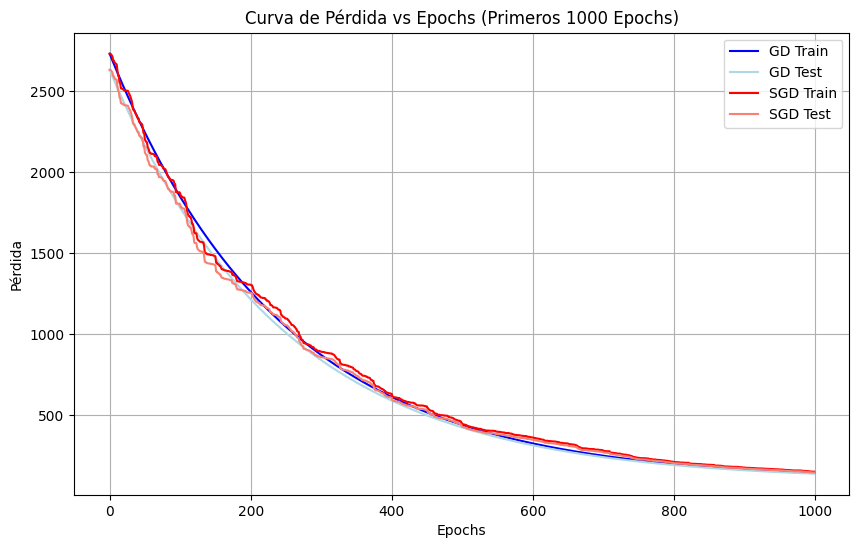

In [125]:
### 3. Compare en una curva de Perdida vs Epoch los dos algoritmos. Nota algo interesante?

import matplotlib.pyplot as plt

# Suponiendo que ya tienes las listas loss_train y loss_test generadas por GD_with_loss y SGD_with_loss,
# y deseas mostrar solo las primeras 1000 épocas

epochs_limit = 1000  # Límite de épocas a mostrar

epochs_GD = range(min(len(loss_train), epochs_limit))  # Número de épocas para GD
epochs_SGD = range(min(len(stochastic_loss_train), epochs_limit))  # Número de épocas para SGD

plt.figure(figsize=(10, 6))

# Curva de pérdida para GD
plt.plot(epochs_GD, loss_train[:epochs_limit], label='GD Train', color='blue')
plt.plot(epochs_GD, loss_test[:epochs_limit], label='GD Test', color='lightblue')

# Curva de pérdida para SGD
plt.plot(epochs_SGD, stochastic_loss_train[:epochs_limit], label='SGD Train', color='red')
plt.plot(epochs_SGD, stochastic_loss_test[:epochs_limit], label='SGD Test', color='salmon')

plt.title('Curva de Pérdida vs Epochs (Primeros 1000 Epochs)')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()


Se aprecia cómo GD genera una curva suave y SGD genera una curva "ruidosa", pero ambos avanzan hacia una convergencia.

### Ejercicio 7

En este ejercicio vamos a considerar la regresión logística como un problema de clasificación binaria.
La implementación de la misma podemos considerar la siguiente:

```python

class LogisticRegressionSGD():
    def __init__(self, lr=0.01, max_iter=1000, tol=1e-3, random_state=42):
        self.lr = lr
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.weights = None
        self.loss = None
        self.loss_history = None
        self.grad_history = None
        self.theta_history = None

    def fit(self, X, y):
        """
        Fit the model according to the given training data.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).

        Returns:
        self : LogisticRegressionSGD
            The fitted model.
        """
        np.random.seed(self.random_state)
        self.weights = np.random.normal(size=X.shape[1])
        self.loss_history = []
        self.grad_history = []
        self.theta_history = []

        self.SGD(X, y)

        return self

    def _step(self, X, y):
        """
        Perform a single gradient step.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).

        Returns:
        loss : float
            The value of the loss function for the current value of the weights.

        grad : numpy.ndarray
            The gradient of the loss function for the current value of the weights.
        """
        N = len(y)
        y_hat = self.logit(X)
        loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
        grad = (-1 / N) * X.T.dot(y - y_hat)

        return loss, grad

    def SGD(self, X, y):
        """
        Perform the stochastic gradient descent optimization algorithm.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).
        """
        ...

    def logit(self, X):
        """
        Calculate the logit of a set of observations.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        Returns:
        logit : numpy.ndarray
            The logit of the observations. An array of shape (n_samples,).
        """
        return 1 / (1 + np.exp(-X.dot(self.weights)))
    
    def predict_proba(self, X):
        """
        Predict the probability of each class for a set of observations.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        Returns:
        proba : numpy.ndarray
            The predicted probability of each class. An array of shape (n_samples,).
        """
        return self.logit(X)
    
    def predict(self, X):
        """
        Predict the class of a set of observations.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        Returns:
        y_pred : numpy.ndarray
            The predicted class. An array of shape (n_samples,).
        """
        return (self.predict_proba(X) >= 0.5).astype(int)
    
    def score(self, X, y):
        """
        Calculate the accuracy of the model.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).

        Returns:
        score : float
            The accuracy of the model.
        """
        return np.mean(self.predict(X) == y)

```

Con esta clase, vamos a tomar el dataset de breast cancer y vamos a realizar una clasificación binaria.
La idea de este ejercicio es que puedan jugar con la manera de obtener los hiperparámetros óptimos para el modelo.

Para ello van a tener que completar el método `SGD` de la clase `LogisticRegressionSGD` y luego realizar una búsqueda de grilla para encontrar los mejores hiperparámetros.

In [15]:

class LogisticRegressionSGD():
    def __init__(self, lr=0.01, max_iter=1000, tol=1e-3, random_state=42):
        self.lr = lr
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.weights = None
        self.loss = None
        self.loss_history = None
        self.grad_history = None
        self.theta_history = None

    def fit(self, X, y):
        """
        Fit the model according to the given training data.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).

        Returns:
        self : LogisticRegressionSGD
            The fitted model.
        """
        np.random.seed(self.random_state)
        self.weights = np.random.normal(size=X.shape[1])
        self.loss_history = []
        self.grad_history = []
        self.theta_history = []

        self.SGD(X, y, max_iterations=self.max_iter,tol=self.tol)

        return self

    def _step(self, X, y):
        """
        Perform a single gradient step.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).

        Returns:
        loss : float
            The value of the loss function for the current value of the weights.

        grad : numpy.ndarray
            The gradient of the loss function for the current value of the weights.
        """
        N = len(y)
        y_hat = self.logit(X)
        loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
        grad = (-1 / N) * X.T.dot(y - y_hat)

        return loss, grad

    def SGD(self, X_train, y_train, learning_rate=0.01, max_iterations=1000, tol=1e-6):               
        n = X_train.shape[0]
        m = X_train.shape[1]

        tetha = np.random.randn(m).reshape(m, 1)

        for i in range(max_iterations):
            idx = np.random.permutation(X_train.shape[0])
            X_train = X_train[idx]
            y_train = y_train[idx]

            prev_Theta = np.copy(tetha) 

            for j in range(n):                
                prediction = 1 / (1 + np.exp(-(np.dot(X_train[j].reshape(1, -1), tetha))))
                error = y_train[j] - prediction
                gradient = (X_train[j] * error).reshape(-1, 1)

                tetha = tetha + learning_rate * gradient

            weight_change = np.linalg.norm(tetha - prev_Theta)

            if weight_change < tol:
                break        
        return tetha
    
    def get_params(self, deep=True):
        return {
            'lr': self.lr,
            'max_iter': self.max_iter,
            'tol': self.tol,
            'random_state': self.random_state
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

    def logit(self, X):
        """
        Calculate the logit of a set of observations.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        Returns:
        logit : numpy.ndarray
            The logit of the observations. An array of shape (n_samples,).
        """
        return 1 / (1 + np.exp(-X.dot(self.weights)))
    
    def predict_proba(self, X):
        """
        Predict the probability of each class for a set of observations.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        Returns:
        proba : numpy.ndarray
            The predicted probability of each class. An array of shape (n_samples,).
        """
        return self.logit(X)
    
    def predict(self, X):
        """
        Predict the class of a set of observations.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        Returns:
        y_pred : numpy.ndarray
            The predicted class. An array of shape (n_samples,).
        """
        return (self.predict_proba(X) >= 0.5).astype(int)
    
    def score(self, X, y):
        """
        Calculate the accuracy of the model.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).

        Returns:
        score : float
            The accuracy of the model.
        """
        return np.mean(self.predict(X) == y)
    

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Crear datos de ejemplo (reemplaza esto con tus datos)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Definir los hiperparámetros que deseas buscar
param_grid = {
    'lr': [0.001, 0.01, 0.1],  # Lista de tasas de aprendizaje para probar
    'max_iter': [1000, 2000, 3000]  # Lista de números máximos de iteraciones para probar
}

# Crear una instancia de la clase LogisticRegressionSGD
model = LogisticRegressionSGD()

# Inicializar GridSearchCV con el modelo y el conjunto de hiperparámetros
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda de grilla en los datos
grid_search.fit(X, y)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Calcular la precisión usando los mejores hiperparámetros
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Precisión con los mejores hiperparámetros: {accuracy:.4f}")


[[ 0.05824887]
 [-0.1273332 ]
 [ 0.2232712 ]
 [ 0.17735555]
 [-0.01812737]
 [ 1.17954601]
 [-0.07888925]
 [-0.0067592 ]
 [ 0.0297264 ]
 [ 0.00696698]
 [ 0.10764061]
 [ 0.37215946]
 [-0.00204141]
 [ 0.03789549]
 [-0.56110002]
 [ 0.0388202 ]
 [ 0.0204301 ]
 [-0.05753824]
 [-1.63136903]
 [ 0.03805799]]
[[ 0.06934602]
 [-0.14484863]
 [ 0.3048545 ]
 [ 0.17694802]
 [ 0.0524855 ]
 [ 1.24779517]
 [-0.08732647]
 [ 0.0237875 ]
 [ 0.04496673]
 [-0.02221107]
 [ 0.17859213]
 [ 0.40484852]
 [ 0.02752569]
 [ 0.13821552]
 [-0.59133089]
 [ 0.08581769]
 [ 0.04334279]
 [-0.11481412]
 [-1.66202567]
 [ 0.07991836]]
[[ 2.28428973e-02]
 [-1.47090103e-01]
 [ 1.83281399e-01]
 [ 1.81847799e-01]
 [ 3.64243057e-02]
 [ 1.27181359e+00]
 [-5.17519842e-02]
 [-7.16892158e-04]
 [-2.11973516e-02]
 [-1.70540761e-02]
 [ 1.91578589e-01]
 [ 4.29044552e-01]
 [-4.37234633e-02]
 [ 1.34912570e-01]
 [-6.11550706e-01]
 [ 9.79904009e-02]
 [ 1.53973117e-02]
 [-9.10043182e-03]
 [-1.67095331e+00]
 [ 1.52454908e-02]]
[[ 0.2085672 ]
 [